In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-fraud/card_transdata.csv')

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# Remove duplicates
df = df.drop_duplicates()

# Handle null values
df = df.dropna()


In [7]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [8]:
x=df.drop('fraud',axis=1)
y=df['fraud']

In [9]:
# Split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [10]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='liblinear')
classifier.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [11]:
y_predict=classifier.predict(x_test)

In [12]:
Results=pd.DataFrame({'Actual':y_test,'Predictions':y_predict})
Results.head(5)

,Actual,Predictions
276826,0.0,0.0
849425,0.0,0.0
504499,0.0,0.0
601054,0.0,0.0
980221,1.0,0.0


In [13]:
print(accuracy_score(y_test,y_predict))

0.95857


In [14]:
y_train_predict=classifier.predict(x_train)
print(accuracy_score(y_train,y_train_predict))

0.9587257142857143


In [15]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[271789   1874]
 [ 10555  15782]]


Text(95.72222222222221, 0.5, 'True Label')

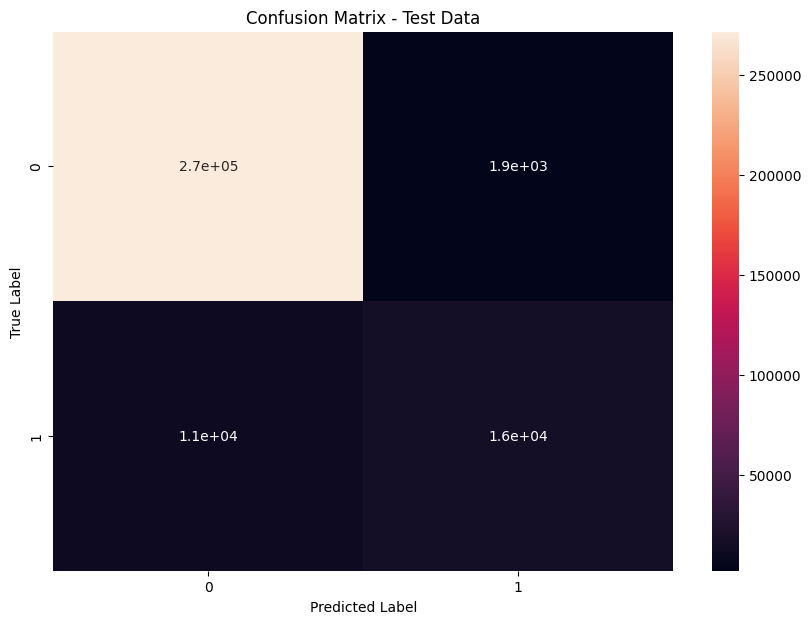

In [16]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

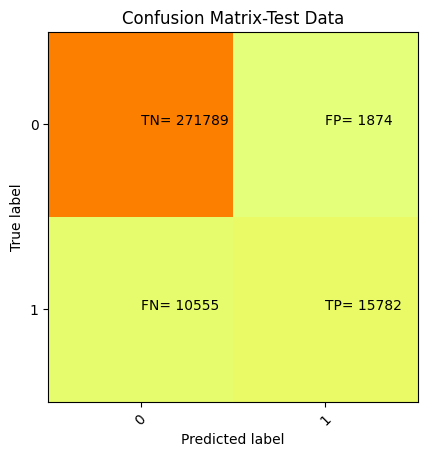

In [17]:
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"= "+str(cm[i][j]))
plt.show()

In [18]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273663
         1.0       0.89      0.60      0.72     26337

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000



In [19]:
nt=cm[0][0]
pf=cm[0][1]
nf=cm[1][0]
pt=cm[1][1]

In [20]:
recall=pt/(pt+nf)
print('Recall=',recall)

Recall= 0.599233018187341


In [21]:
precision=pt/(pt+pf)
print("Precision=",precision)

Precision= 0.8938604440416855


In [22]:
specificity = nt /  (nt + pf)
print("Specificity = ", specificity)

Specificity =  0.9931521616002164


In [23]:
accuracy = ( pt + nt ) / ( pt + nt + pf + nf)
print("accuracy =" , accuracy)

accuracy = 0.95857
